In [1]:
import pandas as pd

In [2]:
#Cleaned data, removed "", changed separator
#should try with thi instead: engine="python", sep=',', quotechar='"', error_bad_lines=False)

In [3]:
df = pd.read_csv('SMSSpamCollection.csv', sep='¤', engine='python')

In [4]:
df.head()

,CATEGORY,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df[222:250]

,CATEGORY,SMS
222,ham,There is os called ubandu which will run witho...
223,ham,"Sorry, I'll call later"
224,ham,U say leh... Of course nothing happen lar. Not...
225,spam,"500 New Mobiles from 2004, MUST GO! Txt: NOKIA..."
226,ham,Would really appreciate if you call me. Just n...
227,spam,Will u meet ur dream partner soon? Is ur caree...
228,ham,Hey company elama po mudyadhu.
229,ham,Life is more strict than teacher... Bcoz Teach...
230,ham,Dear good morning now only i am up
231,ham,Get down in gandhipuram and walk to cross cut ...


In [6]:
print('NR OF SAMPLES:', len(df))

NR OF SAMPLES: 5574


In [30]:
spamDf = df.loc[df['CATEGORY'] == 'spam']
spamDf.head()

,CATEGORY,SMS
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


Matplotlib is building the font cache; this may take a moment.


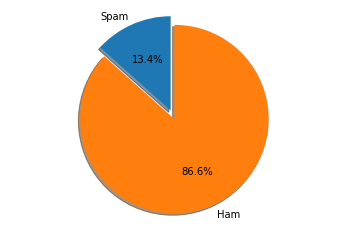

In [34]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Spam', 'Ham'
sizes = [len(spamDf), len(df.loc[df['CATEGORY'] == 'ham'])]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [7]:
#check for empty values ....   
#df.isnull().sum()
#df.info()
# - invalid values?
#df.dropna(inplace=True)  # will remove rows with NA

In [8]:
X = df['SMS']
y = df['CATEGORY']

In [9]:
y.unique()

array(['ham', 'spam', 'spam '], dtype=object)

In [10]:
y = y.str.strip()
y.unique()

array(['ham', 'spam'], dtype=object)

In [11]:
y[y == 'spam'] = 1
y[y == 'ham'] = 0
y[:5]

0    0
1    0
2    1
3    0
4    0
Name: CATEGORY, dtype: object

In [12]:
import numpy as np
y = np.asarray(y).astype(int)

In [13]:
print('***** Nr of characters the longest content is: ',
max([len(x) for x in X]))

***** Nr of characters the longest content is:  910


In [14]:
#TRY TO VISUALIZE THE DATA ! ! !

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
total_words = len(tokenizer.word_index) + 1
total_words

9009

In [16]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [17]:
X = tokenizer.texts_to_sequences(X)
X[:3]

[[49,
  471,
  4434,
  842,
  755,
  658,
  64,
  8,
  1327,
  88,
  123,
  351,
  1328,
  148,
  2996,
  1329,
  67,
  58,
  4435,
  144],
 [46, 336, 1499, 472, 6, 1940],
 [47,
  489,
  8,
  19,
  4,
  797,
  901,
  2,
  176,
  1941,
  1105,
  659,
  1942,
  2331,
  261,
  2332,
  71,
  1941,
  2,
  1943,
  2,
  337,
  489,
  555,
  960,
  73,
  391,
  174,
  660,
  392,
  2997]]

In [18]:
# pad content based on the longest SMS...
max_SMS_len = max(len(x) for x in X)
print('*****Max words in SMS:', max_SMS_len)

from tensorflow.keras.preprocessing.sequence import pad_sequences
X = pad_sequences(X, maxlen=100)
X[2]

*****Max words in SMS: 189


array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,   47,  489,    8,   19,    4,  797,  901,    2,
        176, 1941, 1105,  659, 1942, 2331,  261, 2332,   71, 1941,    2,
       1943,    2,  337,  489,  555,  960,   73,  391,  174,  660,  392,
       2997])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 22)
print('***** Shape of training samples: ', X_train.shape)
print('***** Shape of testing samples: ', X_test.shape)

***** Shape of training samples:  (3901, 100)
***** Shape of testing samples:  (1673, 100)


In [20]:
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Embedding(9009, 128)) # 48998 distinct words, 128 neurons (columns in Excel)
# model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(LSTM(100, dropout=0.4, recurrent_dropout=0.4))
# model.add(Dense(units=64, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model.fit(X_train, y_train,
          batch_size=32,
          epochs=3,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/3
122/122 [==============================] - 30s 214ms/step - loss: 0.1823 - accuracy: 0.9369 - val_loss: 0.0475 - val_accuracy: 0.9892
Epoch 2/3
122/122 [==============================] - 26s 213ms/step - loss: 0.0328 - accuracy: 0.9905 - val_loss: 0.0504 - val_accuracy: 0.9851
Epoch 3/3
122/122 [==============================] - 26s 212ms/step - loss: 0.0098 - accuracy: 0.9979 - val_loss: 0.0496 - val_accuracy: 0.9863


In [23]:
score, acc = model.evaluate(X_test, y_test,
                            batch_size=32,
                            verbose=2)
print('Test score:', score)
print('Test accuracy:', acc)

53/53 - 1s - loss: 0.0496 - accuracy: 0.9863 - 1s/epoch - 28ms/step
Test score: 0.04964835196733475
Test accuracy: 0.9862522482872009


In [24]:
new_SMS = "I am tired of doing the same things every day"
new_SMS = tokenizer.texts_to_sequences([new_SMS])
#print(new_SMS)
new_SMS = pad_sequences(new_SMS, maxlen=100)

In [25]:
result = model.predict(new_SMS)
result

array([[0.00039509]], dtype=float32)

In [26]:
new_SPAM = "500 fresh burguers MUST GO! Txt: KING to No: 220022"
new_SPAM = tokenizer.texts_to_sequences([new_SPAM])
#print(new_SPAM)
new_SPAM = pad_sequences(new_SPAM, maxlen=100)
result = model.predict(new_SPAM)
print(result)

[[0.6118981]]


In [27]:
model.save("model.h5")